# ETUTSUZ PARAMETRESİZ OUTLIERLI

/var/folders/01/_bgw0fxs5rv8ysw_gs46q0v40000gn/T/ipykernel_2376/1603706753.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns] = X[categorical_columns].apply(lambda col: col.astype('category').cat.codes)


Iterasyon 1: Train MAPE: 0.17343, Test MAPE: 0.23665
Iterasyon 1: Train MAE: 64.10309, Test MAE: 96.55500
Iterasyon 1: Train MSE: 64.10309, Test MSE: 96.55500
Iterasyon 1: Train R²: 0.86384, Test R²: 0.81011
Iterasyon 2: Train MAPE: 0.17343, Test MAPE: 0.23665
Iterasyon 2: Train MAE: 64.10309, Test MAE: 96.55500
Iterasyon 2: Train MSE: 64.10309, Test MSE: 96.55500
Iterasyon 2: Train R²: 0.86384, Test R²: 0.81011
Iterasyon 3: Train MAPE: 0.17343, Test MAPE: 0.23665
Iterasyon 3: Train MAE: 64.10309, Test MAE: 96.55500
Iterasyon 3: Train MSE: 64.10309, Test MSE: 96.55500
Iterasyon 3: Train R²: 0.86384, Test R²: 0.81011
Iterasyon 4: Train MAPE: 0.17343, Test MAPE: 0.23665
Iterasyon 4: Train MAE: 64.10309, Test MAE: 96.55500
Iterasyon 4: Train MSE: 64.10309, Test MSE: 96.55500
Iterasyon 4: Train R²: 0.86384, Test R²: 0.81011
Iterasyon 5: Train MAPE: 0.17343, Test MAPE: 0.23665
Iterasyon 5: Train MAE: 64.10309, Test MAE: 96.55500
Iterasyon 5: Train MSE: 64.10309, Test MSE: 96.55500
Iterasyon

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.2s finished


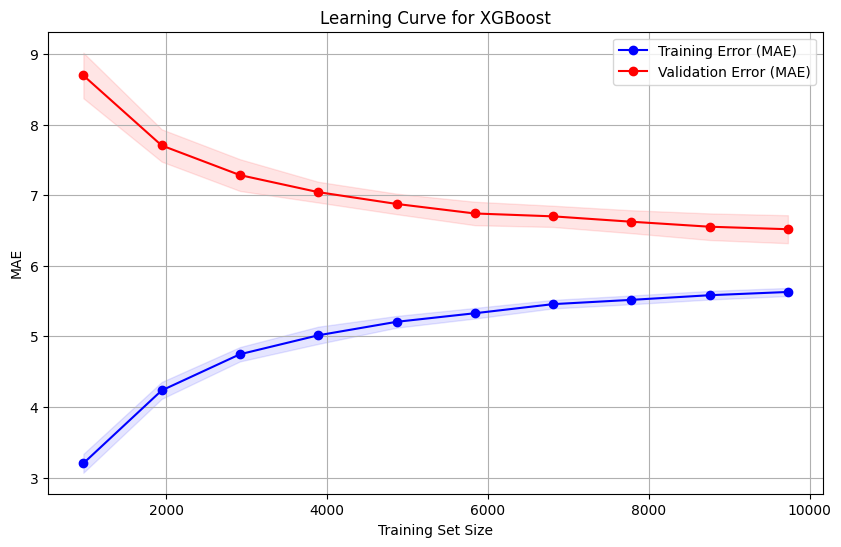

/var/folders/01/_bgw0fxs5rv8ysw_gs46q0v40000gn/T/ipykernel_2376/1603706753.py:151: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


Toplam çalışma süresi: 11.11 saniye


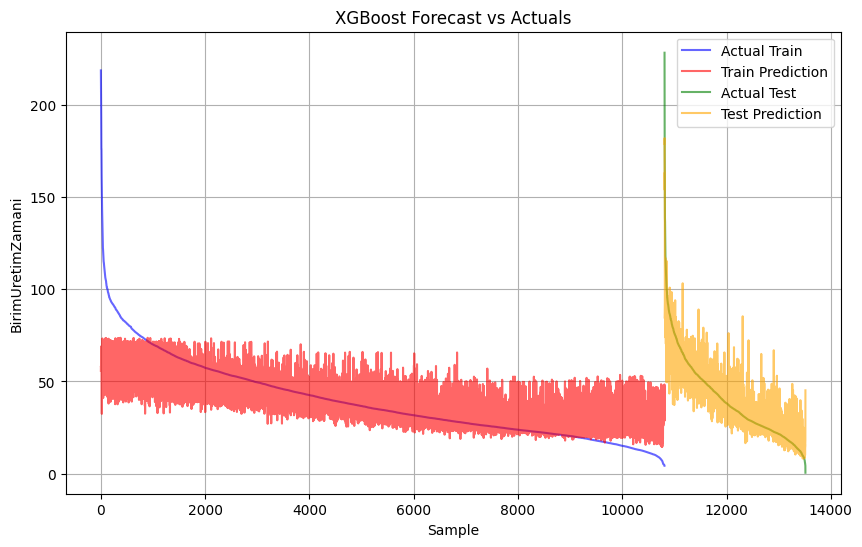

En Düşük 20 Özellik:
              Feature  Importance
1          PersonelNo    0.017814
2         ModelTipAdi    0.034727
6       SIPARIS_ADEDI    0.039451
8         GIYSI_CINSI    0.066143
7         GIYSI_GRUBU    0.069214
4          MakinaTipi    0.081803
9  GIYSI_CINSI_DETAYI    0.112154
0            ModelAdi    0.120400
5              Uretim    0.176839
3             OperAdi    0.281454


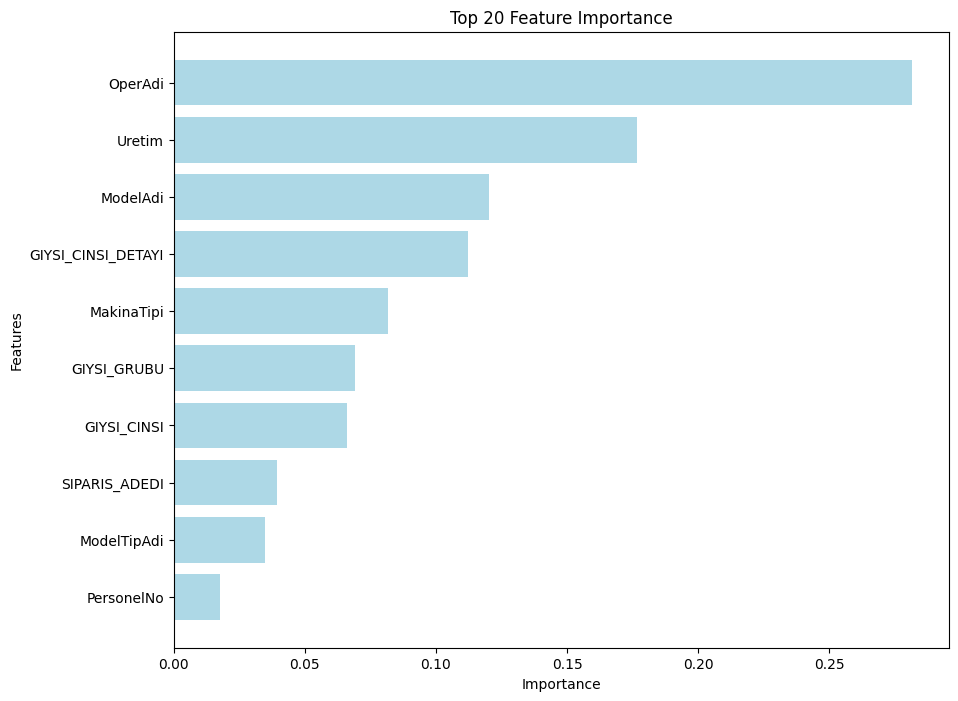

In [7]:
# Gerekli kütüphaneleri yükleyin
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import time

# Veriyi yükleyelim
data_path = 'birim_uretim_zamani_duzenlenmis.csv'
data = pd.read_csv(data_path)

# Özellik ve hedef değişkenleri belirleme
X = data[['ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi', 'Uretim', 'SIPARIS_ADEDI', 'GIYSI_GRUBU',
          'GIYSI_CINSI', 'GIYSI_CINSI_DETAYI']]
categorical_columns = ['ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi',
                       'GIYSI_GRUBU', 'GIYSI_CINSI', 'GIYSI_CINSI_DETAYI']

# Kategorik verileri label encoding yapalım
X[categorical_columns] = X[categorical_columns].apply(lambda col: col.astype('category').cat.codes)

y = data['BirimUretimZamani']  # Hedef değişken

# Veriyi eğitim ve test seti olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DMatrix'e verileri yükleme
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Model parametreleri (Hiperparametre araması yapılmadan)
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'eval_metric': 'mae',
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Zamanlayıcı başlat
start_time = time.time()

# 10 defa cross-validation yaparak sonuçları toplama
train_mape_list = []
test_mape_list = []
train_mae_list = []
test_mae_list = []
train_mse_list = []
test_mse_list = []
train_r2_list = []
test_r2_list = []

for i in range(10):
    # XGBoost modelini eğitme
    model = xgb.train(params, dtrain, num_boost_round=100)
    
    # Tahminler
    y_train_pred = model.predict(dtrain)
    y_test_pred = model.predict(dtest)
    
    # MAPE hesaplamaları
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    train_mape_list.append(train_mape)
    test_mape_list.append(test_mape)
    
    # MAE hesaplamaları
    train_mae = mean_squared_error(y_train, y_train_pred)
    test_mae = mean_squared_error(y_test, y_test_pred)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    
    # MSE hesaplamaları
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    
    # R² hesaplamaları
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)
    
    print(f"Iterasyon {i+1}: Train MAPE: {train_mape:.5f}, Test MAPE: {test_mape:.5f}")
    print(f"Iterasyon {i+1}: Train MAE: {train_mae:.5f}, Test MAE: {test_mae:.5f}")
    print(f"Iterasyon {i+1}: Train MSE: {train_mse:.5f}, Test MSE: {test_mse:.5f}")
    print(f"Iterasyon {i+1}: Train R²: {train_r2:.5f}, Test R²: {test_r2:.5f}")

# Ortalama MAPE, MAE, MSE, R² değerleri
mean_train_mape = np.mean(train_mape_list)
mean_test_mape = np.mean(test_mape_list)
mean_train_mae = np.mean(train_mae_list)
mean_test_mae = np.mean(test_mae_list)
mean_train_mse = np.mean(train_mse_list)
mean_test_mse = np.mean(test_mse_list)
mean_train_r2 = np.mean(train_r2_list)
mean_test_r2 = np.mean(test_r2_list)

print(f"\nOrtalama Train MAPE: {mean_train_mape:.5f}")
print(f"Ortalama Test MAPE: {mean_test_mape:.5f}")
print(f"Ortalama Train MAE: {mean_train_mae:.5f}")
print(f"Ortalama Test MAE: {mean_test_mae:.5f}")
print(f"Ortalama Train MSE: {mean_train_mse:.5f}")
print(f"Ortalama Test MSE: {mean_test_mse:.5f}")
print(f"Ortalama Train R²: {mean_train_r2:.5f}")
print(f"Ortalama Test R²: {mean_test_r2:.5f}")

# Öğrenme Eğrisi (Learning Curve) oluşturma
train_sizes, train_scores, validation_scores = learning_curve(
    xgb.XGBRegressor(**params, n_estimators=100), X_train, y_train, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42, verbose=1
)

# Öğrenme Eğrisi Plot'u
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
validation_scores_std = validation_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Error (MAE)")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="red", label="Validation Error (MAE)")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, color="red", alpha=0.1)
plt.title("Learning Curve for XGBoost")
plt.xlabel("Training Set Size")
plt.ylabel("MAE")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Zamanlayıcı durdur
end_time = time.time()
print(f"Toplam çalışma süresi: {(end_time - start_time):.2f} saniye")

# Önceki MAPE sonuçlarını toplamak için bir DataFrame oluşturulması (örneğin sonuçları saklayacak bir tablo)
results = pd.DataFrame(columns=['Iteration', 'Train MAPE', 'Test MAPE'])

# MAPE sonuçlarını ve iterasyonları tabloya ekleme
for i in range(10):
    result_row = pd.DataFrame({
        'Iteration': [i + 1],
        'Train MAPE': [train_mape_list[i]],
        'Test MAPE': [test_mape_list[i]]
    })
    results = pd.concat([results, result_row], ignore_index=True)

# Ortalama MAPE sonuçlarını ekleyelim
mean_result_row = pd.DataFrame({
    'Iteration': ['Average'],
    'Train MAPE': [mean_train_mape],
    'Test MAPE': [mean_test_mape]
})
results = pd.concat([results, mean_result_row], ignore_index=True)

# Performansı görselleştirelim (Train ve Test seti üzerinde, tek bir plot ile)
fig, ax = plt.subplots(figsize=(10, 6))

# Train verilerini büyükten küçüğe sıralama
sorted_train_indices = np.argsort(-y_train)
y_train_sorted = y_train.iloc[sorted_train_indices]
y_train_pred_sorted = y_train_pred_cv[sorted_train_indices]

# Test verilerini büyükten küçüğe sıralama
sorted_test_indices = np.argsort(-y_test)
y_test_sorted = y_test.iloc[sorted_test_indices]
y_test_pred_sorted = y_test_pred[sorted_test_indices]

# Gerçek ve tahmin edilen değerleri çiz
ax.plot(y_train_sorted.values, label='Actual Train', color='blue', alpha=0.6)
ax.plot(y_train_pred_sorted, label='Train Prediction', color='red', alpha=0.6)
ax.plot(range(len(y_train_sorted), len(y_train_sorted) + len(y_test_sorted)), 
        y_test_sorted.values, label='Actual Test', color='green', alpha=0.6)
ax.plot(range(len(y_train_sorted), len(y_train_sorted) + len(y_test_sorted)), 
        y_test_pred_sorted, label='Test Prediction', color='orange', alpha=0.6)

# Grafiğin başlık ve etiketleri
ax.set_title(f'XGBoost Forecast vs Actuals')
ax.set_xlabel('Sample')
ax.set_ylabel('BirimUretimZamani')
ax.legend()
plt.grid(True)
plt.show()

# Modelden feature_importances_ değerlerini alın
importances = best_model.feature_importances_

# Özellik isimlerini alın
feature_names = X.columns

# Özellik önem derecelerini DataFrame olarak oluşturun
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Önem derecelerine göre büyükten küçüğe sıralama
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# İlk 20 yüksek özelliği görüntüleme
top_20_features = feature_importance_df_sorted.head(20)

# İlk 20 özelliği büyükten küçüğe sıralama
top_20_features = top_20_features.sort_values(by='Importance', ascending=True)

# En düşük 20 özelliği görüntüleme
low_20_features = feature_importance_df_sorted.tail(20)

# En düşük 20 özelliği küçükten büyüğe sıralama
low_20_features = low_20_features.sort_values(by='Importance', ascending=True)

# En düşük 20 özelliği print etme
print("En Düşük 20 Özellik:")
print(low_20_features)

# Tüm özellik önem derecelerini büyükten küçüğe sıralanmış olarak CSV dosyasına yazdırma
feature_importance_df_sorted.to_csv('feature_importance_sorted.csv', index=False)

# Görselleştirme
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importance')
plt.show()


# ETUTSUZ PARAMETRELİ OUTLIERLI

/var/folders/01/_bgw0fxs5rv8ysw_gs46q0v40000gn/T/ipykernel_2376/2717196070.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns] = X[categorical_columns].apply(lambda col: col.astype('category'))


En iyi parametreler: OrderedDict([('colsample_bylevel', 0.7), ('colsample_bytree', 0.7), ('learning_rate', 0.01), ('max_depth', 3), ('min_child_weight', 20), ('n_estimators', 500), ('reg_alpha', 1.0), ('reg_lambda', 10.0), ('subsample', 0.7)])


/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Iterasyon 1: Train MAPE: 0.18519, Test MAPE: 0.18884, Train MAE: 7.31315, Test MAE: 7.54906, Train MSE: 119.58632, Test MSE: 134.12672, Train R^2: 0.74599, Test R^2: 0.73622


/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Iterasyon 2: Train MAPE: 0.18508, Test MAPE: 0.18847, Train MAE: 7.30863, Test MAE: 7.53435, Train MSE: 119.76172, Test MSE: 133.81659, Train R^2: 0.74562, Test R^2: 0.73683


/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Iterasyon 3: Train MAPE: 0.18417, Test MAPE: 0.18761, Train MAE: 7.27290, Test MAE: 7.49992, Train MSE: 118.78903, Test MSE: 133.42905, Train R^2: 0.74768, Test R^2: 0.73759


/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Iterasyon 4: Train MAPE: 0.18494, Test MAPE: 0.18882, Train MAE: 7.30329, Test MAE: 7.54840, Train MSE: 119.46325, Test MSE: 134.15328, Train R^2: 0.74625, Test R^2: 0.73617


/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Iterasyon 5: Train MAPE: 0.18518, Test MAPE: 0.18885, Train MAE: 7.31290, Test MAE: 7.54961, Train MSE: 119.16852, Test MSE: 133.71330, Train R^2: 0.74688, Test R^2: 0.73703


/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Iterasyon 6: Train MAPE: 0.18398, Test MAPE: 0.18717, Train MAE: 7.26527, Test MAE: 7.48251, Train MSE: 118.44300, Test MSE: 132.38820, Train R^2: 0.74842, Test R^2: 0.73964


/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Iterasyon 7: Train MAPE: 0.18471, Test MAPE: 0.18792, Train MAE: 7.29420, Test MAE: 7.51246, Train MSE: 119.08153, Test MSE: 133.57883, Train R^2: 0.74706, Test R^2: 0.73730


/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Iterasyon 8: Train MAPE: 0.18436, Test MAPE: 0.18865, Train MAE: 7.28045, Test MAE: 7.54143, Train MSE: 118.55601, Test MSE: 134.44680, Train R^2: 0.74818, Test R^2: 0.73559


/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Iterasyon 9: Train MAPE: 0.18508, Test MAPE: 0.18892, Train MAE: 7.30884, Test MAE: 7.55212, Train MSE: 119.66146, Test MSE: 134.26682, Train R^2: 0.74583, Test R^2: 0.73594


/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Iterasyon 10: Train MAPE: 0.18502, Test MAPE: 0.18866, Train MAE: 7.30662, Test MAE: 7.54172, Train MSE: 119.78280, Test MSE: 133.90587, Train R^2: 0.74557, Test R^2: 0.73665

Ortalama Train MAPE: 0.18477
Ortalama Test MAPE: 0.18839
Ortalama Train MAE: 7.29662
Ortalama Test MAE: 7.53116
Ortalama Train MSE: 119.22936
Ortalama Test MSE: 133.78255
Ortalama Train R^2: 0.74675
Ortalama Test R^2: 0.73690
[learning_curve] Training set sizes: [ 972 1945 2918 3891 4864 5837 6810 7783 8756 9729]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.9s finished


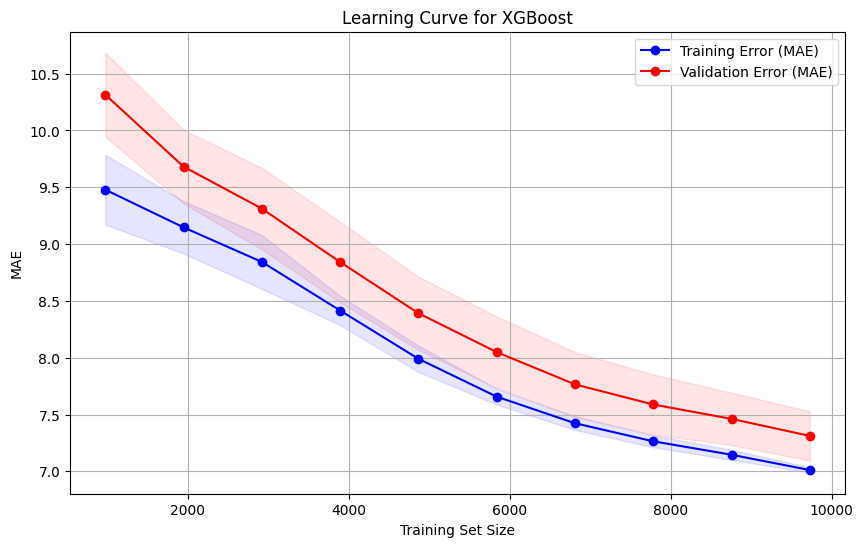

/var/folders/01/_bgw0fxs5rv8ysw_gs46q0v40000gn/T/ipykernel_2376/2717196070.py:193: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


Toplam çalışma süresi: 160.49 saniye


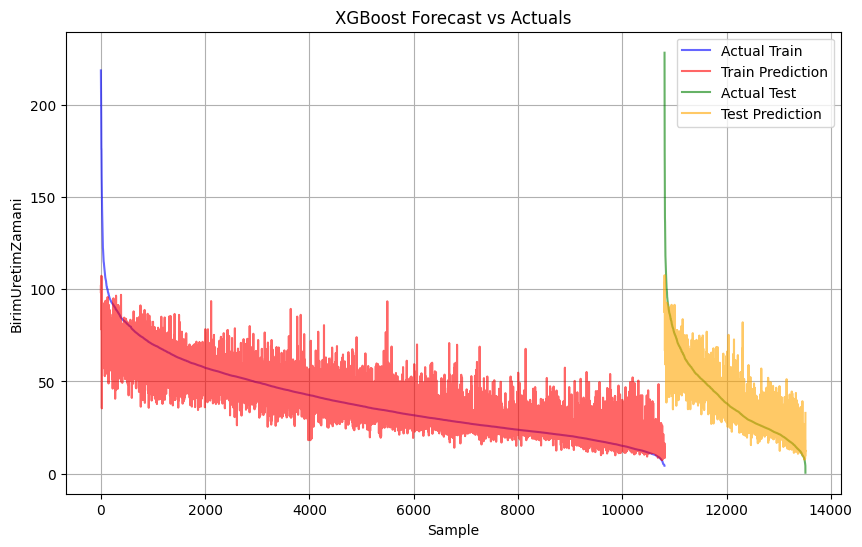

En Düşük 20 Özellik:
              Feature  Importance
8         GIYSI_CINSI    0.027486
2         ModelTipAdi    0.028139
7         GIYSI_GRUBU    0.045786
6       SIPARIS_ADEDI    0.051635
4          MakinaTipi    0.059640
9  GIYSI_CINSI_DETAYI    0.092233
0            ModelAdi    0.093652
1          PersonelNo    0.160205
5              Uretim    0.162881
3             OperAdi    0.278343


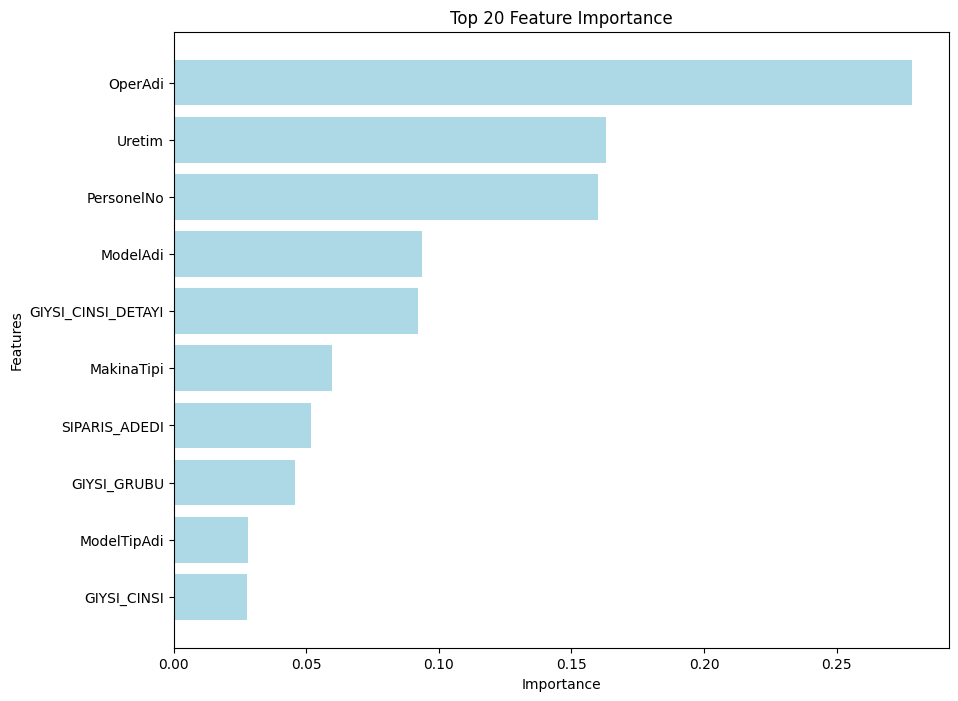

In [8]:
# Gerekli kütüphaneleri yükleyin
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import numpy as np
import matplotlib.pyplot as plt
import time

# Veriyi yükleyelim
data_path = 'birim_uretim_zamani_duzenlenmis.csv'
data = pd.read_csv(data_path)

# Özellik ve hedef değişkenleri belirleme
X = data[['ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi', 'Uretim', 'SIPARIS_ADEDI', 'GIYSI_GRUBU',
          'GIYSI_CINSI', 'GIYSI_CINSI_DETAYI']]
categorical_columns = ['ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi',
                       'GIYSI_GRUBU', 'GIYSI_CINSI', 'GIYSI_CINSI_DETAYI']

# Tüm kategorik sütunları category türüne çevirme
X[categorical_columns] = X[categorical_columns].apply(lambda col: col.astype('category'))

y = data['BirimUretimZamani']  # Hedef değişken

# Veriyi eğitim ve test seti olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DMatrix formatına çevirme
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Hiperparametre arama alanı
param_space = {
    'learning_rate': Real(0.001, 0.01, 'log-uniform'),  # Daha düşük öğrenme oranı
    'max_depth': Integer(2, 3),                         # Daha düşük derinlik
    'min_child_weight': Integer(20, 40),                # Daha yüksek min_child_weight
    'subsample': Real(0.4, 0.7),                        # Daha düşük alt örnekleme oranı
    'colsample_bytree': Real(0.4, 0.7),                 # Daha düşük alt örnekleme özellikleri
    'colsample_bylevel': Real(0.4, 0.7),                # Düşük örnekleme oranı seviye bazında
    'n_estimators': Integer(300, 500),                  # Tahminci sayısını artırmak
    'reg_alpha': Real(1.0, 20.0, 'log-uniform'),        # Çok daha yüksek L1 düzenlileme
    'reg_lambda': Real(10.0, 50.0, 'log-uniform')       # Çok daha yüksek L2 düzenlileme
}

# XGBoost modelini ve BayesSearchCV'yi tanımlama
model = xgb.XGBRegressor(objective='reg:squarederror', 
                         tree_method='hist', 
                         eval_metric='mae', 
                         enable_categorical=True,  # Kategorik veriler için ayar
                         random_state=42)

# Bayes optimizasyonu
opt = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    scoring='neg_mean_absolute_percentage_error',
    n_iter=50,  # Daha fazla iterasyon, daha iyi sonuçlar için (değiştirilebilir)
    cv=10,
    n_jobs=-1,
    random_state=42
)

# Zamanlayıcı başlat
start_time = time.time()

# Modeli eğit ve en iyi parametreleri bul
opt.fit(X_train, y_train)

# En iyi parametreler
best_params = opt.best_params_
print(f"En iyi parametreler: {best_params}")

# Performans değerlendirmesi için 10 iterasyon
train_mape_list = []
test_mape_list = []
train_mae_list = []
test_mae_list = []
train_mse_list = []
test_mse_list = []
train_r2_list = []
test_r2_list = []

for i in range(10):
    # En iyi parametrelerle model oluştur ve eğit
    best_model = xgb.XGBRegressor(**best_params, 
                                  objective='reg:squarederror', 
                                  tree_method='hist', 
                                  eval_metric='mae', 
                                  enable_categorical=True,  # Kategorik veriler için ayar
                                  random_state=i)
    
    # Erken durdurma ile eğitim
    best_model.fit(X_train, y_train, 
                   eval_set=[(X_train, y_train), (X_test, y_test)],
                   early_stopping_rounds=20,  # Erken durdurma için artırıldı
                   verbose=False)
    
    # Eğitim seti üzerinde cross-validation tahminleri yap
    y_train_pred_cv = cross_val_predict(best_model, X_train, y_train, cv=10, n_jobs=-1, method='predict')
    
    # Test seti üzerinde tahminler yap
    y_test_pred = best_model.predict(X_test)
    
    # Metrik hesaplamaları
    train_mae = mean_absolute_error(y_train, y_train_pred_cv)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred_cv)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred_cv)
    test_r2 = r2_score(y_test, y_test_pred)

    # MAPE hesaplamaları
    train_mape = mean_absolute_error(y_train, y_train_pred_cv) / np.mean(y_train)
    test_mape = mean_absolute_error(y_test, y_test_pred) / np.mean(y_test)
    
    train_mape_list.append(train_mape)
    test_mape_list.append(test_mape)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)
    
    print(f"Iterasyon {i+1}: Train MAPE: {train_mape:.5f}, Test MAPE: {test_mape:.5f}, Train MAE: {train_mae:.5f}, Test MAE: {test_mae:.5f}, Train MSE: {train_mse:.5f}, Test MSE: {test_mse:.5f}, Train R^2: {train_r2:.5f}, Test R^2: {test_r2:.5f}")

# Ortalama değerler
mean_train_mape = np.mean(train_mape_list)
mean_test_mape = np.mean(test_mape_list)
mean_train_mae = np.mean(train_mae_list)
mean_test_mae = np.mean(test_mae_list)
mean_train_mse = np.mean(train_mse_list)
mean_test_mse = np.mean(test_mse_list)
mean_train_r2 = np.mean(train_r2_list)
mean_test_r2 = np.mean(test_r2_list)

print(f"\nOrtalama Train MAPE: {mean_train_mape:.5f}")
print(f"Ortalama Test MAPE: {mean_test_mape:.5f}")
print(f"Ortalama Train MAE: {mean_train_mae:.5f}")
print(f"Ortalama Test MAE: {mean_test_mae:.5f}")
print(f"Ortalama Train MSE: {mean_train_mse:.5f}")
print(f"Ortalama Test MSE: {mean_test_mse:.5f}")
print(f"Ortalama Train R^2: {mean_train_r2:.5f}")
print(f"Ortalama Test R^2: {mean_test_r2:.5f}")

# Öğrenme Eğrisi (Learning Curve) oluşturma
train_sizes, train_scores, validation_scores = learning_curve(
    best_model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42, verbose=1
)

# Öğrenme Eğrisi Plot'u
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
validation_scores_std = validation_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Error (MAE)")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="red", label="Validation Error (MAE)")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, color="red", alpha=0.1)
plt.title("Learning Curve for XGBoost")
plt.xlabel("Training Set Size")
plt.ylabel("MAE")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Zamanlayıcı durdur
end_time = time.time()
print(f"Toplam çalışma süresi: {(end_time - start_time):.2f} saniye")

# MAPE sonuçlarını toplamak için bir DataFrame oluşturulması
results = pd.DataFrame(columns=['Iteration', 'Train MAPE', 'Test MAPE', 'Train MAE', 'Test MAE', 
                                'Train MSE', 'Test MSE', 'Train R^2', 'Test R^2'])

# MAPE sonuçlarını tabloya ekleme
for i in range(10):
    result_row = pd.DataFrame({
        'Iteration': [i + 1],
        'Train MAPE': [train_mape_list[i]],
        'Test MAPE': [test_mape_list[i]],
        'Train MAE': [train_mae_list[i]],
        'Test MAE': [test_mae_list[i]],
        'Train MSE': [train_mse_list[i]],
        'Test MSE': [test_mse_list[i]],
        'Train R^2': [train_r2_list[i]],
        'Test R^2': [test_r2_list[i]]
    })
    results = pd.concat([results, result_row], ignore_index=True)

# Ortalama sonuçları ekleyelim
mean_result_row = pd.DataFrame({
    'Iteration': ['Average'],
    'Train MAPE': [mean_train_mape],
    'Test MAPE': [mean_test_mape],
    'Train MAE': [mean_train_mae],
    'Test MAE': [mean_test_mae],
    'Train MSE': [mean_train_mse],
    'Test MSE': [mean_test_mse],
    'Train R^2': [mean_train_r2],
    'Test R^2': [mean_test_r2]
})
results = pd.concat([results, mean_result_row], ignore_index=True)

# Performansı görselleştirme (Train ve Test seti üzerinde, tek bir plot ile)
fig, ax = plt.subplots(figsize=(10, 6))

# Train verilerini büyükten küçüğe sıralama
sorted_train_indices = np.argsort(-y_train)
y_train_sorted = y_train.iloc[sorted_train_indices]
y_train_pred_sorted = y_train_pred_cv[sorted_train_indices]

# Test verilerini büyükten küçüğe sıralama
sorted_test_indices = np.argsort(-y_test)
y_test_sorted = y_test.iloc[sorted_test_indices]
y_test_pred_sorted = y_test_pred[sorted_test_indices]

# Gerçek ve tahmin edilen değerleri çiz
ax.plot(y_train_sorted.values, label='Actual Train', color='blue', alpha=0.6)
ax.plot(y_train_pred_sorted, label='Train Prediction', color='red', alpha=0.6)
ax.plot(range(len(y_train_sorted), len(y_train_sorted) + len(y_test_sorted)), 
        y_test_sorted.values, label='Actual Test', color='green', alpha=0.6)
ax.plot(range(len(y_train_sorted), len(y_train_sorted) + len(y_test_sorted)), 
        y_test_pred_sorted, label='Test Prediction', color='orange', alpha=0.6)

# Grafiğin başlık ve etiketleri
ax.set_title(f'XGBoost Forecast vs Actuals')
ax.set_xlabel('Sample')
ax.set_ylabel('BirimUretimZamani')
ax.legend()
plt.grid(True)
plt.show()

# Modelden feature_importances_ değerlerini alın
importances = best_model.feature_importances_

# Özellik isimlerini alın
feature_names = X.columns

# Özellik önem derecelerini DataFrame olarak oluşturun
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Önem derecelerine göre büyükten küçüğe sıralama
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# İlk 20 yüksek özelliği görüntüleme
top_20_features = feature_importance_df_sorted.head(20)

# İlk 20 özelliği büyükten küçüğe sıralama
top_20_features = top_20_features.sort_values(by='Importance', ascending=True)

# En düşük 20 özelliği görüntüleme
low_20_features = feature_importance_df_sorted.tail(20)

# En düşük 20 özelliği küçükten büyüğe sıralama
low_20_features = low_20_features.sort_values(by='Importance', ascending=True)

# En düşük 20 özelliği print etme
print("En Düşük 20 Özellik:")
print(low_20_features)

# Tüm özellik önem derecelerini büyükten küçüğe sıralanmış olarak CSV dosyasına yazdırma
feature_importance_df_sorted.to_csv('feature_importance_sorted.csv', index=False)

# Görselleştirme
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importance')
plt.show()

# ETUTSUZ PARAMETRESİZ OUTLIERSIZ

C:\Users\berk_\AppData\Local\Temp\ipykernel_17592\1105053478.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns] = X[categorical_columns].apply(lambda col: col.astype('category').cat.codes)


Iterasyon 1: Train MAPE: 0.15953, Test MAPE: 0.15774, Train MAE: 6.10263, Test MAE: 6.01621, Train MSE: 71.61711, Test MSE: 71.75354, Train R^2: 0.80411, Test R^2: 0.81069
Iterasyon 2: Train MAPE: 0.15729, Test MAPE: 0.15576, Train MAE: 6.01673, Test MAE: 5.94045, Train MSE: 70.16950, Test MSE: 69.38894, Train R^2: 0.80807, Test R^2: 0.81693
Iterasyon 3: Train MAPE: 0.15938, Test MAPE: 0.15653, Train MAE: 6.09679, Test MAE: 5.96974, Train MSE: 71.76806, Test MSE: 70.18951, Train R^2: 0.80370, Test R^2: 0.81481
Iterasyon 4: Train MAPE: 0.15835, Test MAPE: 0.15653, Train MAE: 6.05739, Test MAE: 5.96989, Train MSE: 70.69940, Test MSE: 70.28085, Train R^2: 0.80662, Test R^2: 0.81457
Iterasyon 5: Train MAPE: 0.15967, Test MAPE: 0.15800, Train MAE: 6.10786, Test MAE: 6.02613, Train MSE: 71.80776, Test MSE: 71.73221, Train R^2: 0.80359, Test R^2: 0.81074
Iterasyon 6: Train MAPE: 0.15818, Test MAPE: 0.15748, Train MAE: 6.05093, Test MAE: 6.00605, Train MSE: 70.46509, Test MSE: 70.68682, Train 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished


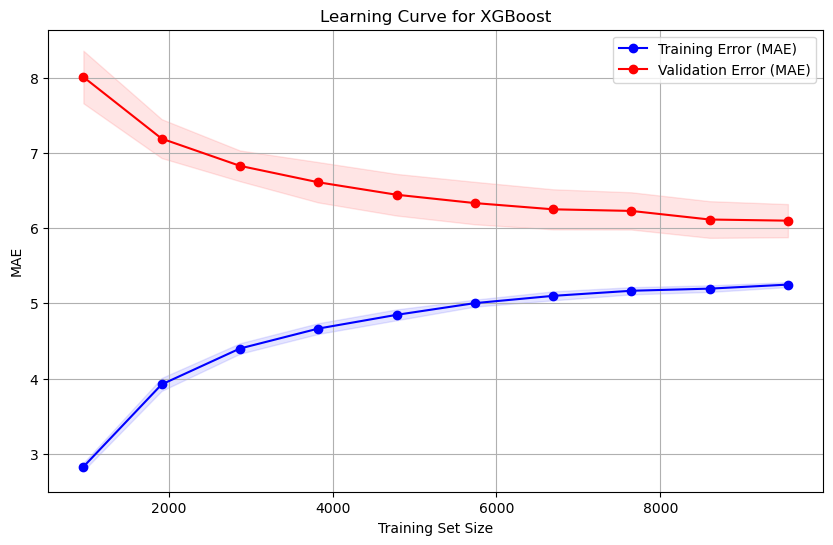

Toplam çalışma süresi: 10.78 saniye


In [5]:
# Gerekli kütüphaneleri yükleyin
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve, cross_val_predict
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import time

# Veriyi yükleyelim
data_path = 'birim_uretim_zamani_duzenlenmis.csv'
data = pd.read_csv(data_path)

# Özellik ve hedef değişkenleri belirleme
X = data[['ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi', 'Uretim', 'SIPARIS_ADEDI', 'GIYSI_GRUBU',
          'GIYSI_CINSI', 'GIYSI_CINSI_DETAYI']]
categorical_columns = ['ModelAdi', 'PersonelNo', 'ModelTipAdi', 'OperAdi', 'MakinaTipi',
                       'GIYSI_GRUBU', 'GIYSI_CINSI', 'GIYSI_CINSI_DETAYI']

# Kategorik verileri label encoding yapalım
X[categorical_columns] = X[categorical_columns].apply(lambda col: col.astype('category').cat.codes)

y = data['BirimUretimZamani']  # Hedef değişken

# Outlier'ları IQR yöntemiyle tespit edip çıkaralım
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outlier'ları çıkardık
filtered_indices = (y >= lower_bound) & (y <= upper_bound)
X = X[filtered_indices]
y = y[filtered_indices]

# Veriyi eğitim ve test seti olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model parametreleri (Hiperparametre araması yapılmadan)
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'eval_metric': 'mae',
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Zamanlayıcı başlat
start_time = time.time()

# 10 defa cross-validation yaparak sonuçları toplama
# Performans değerlendirmesi için 10 iterasyon
train_mape_list = []
test_mape_list = []
train_mae_list = []
test_mae_list = []
train_mse_list = []
test_mse_list = []
train_r2_list = []
test_r2_list = []

for i in range(10):
    # XGBoost modelini oluştur ve eğit
    model = xgb.XGBRegressor(**params, n_estimators=100, random_state=i)
    
    # Eğitim seti üzerinde cross-validation tahminleri yap
    y_train_pred_cv = cross_val_predict(model, X_train, y_train, cv=10, n_jobs=-1, method='predict')
    
    # Eğitim ve test setlerinde model eğitimi
    model.fit(X_train, y_train)
    
    # Test seti üzerinde tahminler
    y_test_pred = model.predict(X_test)
    
     # Metrik hesaplamaları
    train_mae = mean_absolute_error(y_train, y_train_pred_cv)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred_cv)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred_cv)
    test_r2 = r2_score(y_test, y_test_pred)

    # MAPE hesaplamaları
    train_mape = mean_absolute_error(y_train, y_train_pred_cv) / np.mean(y_train)
    test_mape = mean_absolute_error(y_test, y_test_pred) / np.mean(y_test)
    
    train_mape_list.append(train_mape)
    test_mape_list.append(test_mape)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)
    
    print(f"Iterasyon {i+1}: Train MAPE: {train_mape:.5f}, Test MAPE: {test_mape:.5f}, Train MAE: {train_mae:.5f}, Test MAE: {test_mae:.5f}, Train MSE: {train_mse:.5f}, Test MSE: {test_mse:.5f}, Train R^2: {train_r2:.5f}, Test R^2: {test_r2:.5f}")


# Ortalama değerler
mean_train_mape = np.mean(train_mape_list)
mean_test_mape = np.mean(test_mape_list)
mean_train_mae = np.mean(train_mae_list)
mean_test_mae = np.mean(test_mae_list)
mean_train_mse = np.mean(train_mse_list)
mean_test_mse = np.mean(test_mse_list)
mean_train_r2 = np.mean(train_r2_list)
mean_test_r2 = np.mean(test_r2_list)

print(f"\nOrtalama Train MAPE: {mean_train_mape:.5f}")
print(f"Ortalama Test MAPE: {mean_test_mape:.5f}")
print(f"Ortalama Train MAE: {mean_train_mae:.5f}")
print(f"Ortalama Test MAE: {mean_test_mae:.5f}")
print(f"Ortalama Train MSE: {mean_train_mse:.5f}")
print(f"Ortalama Test MSE: {mean_test_mse:.5f}")
print(f"Ortalama Train R^2: {mean_train_r2:.5f}")
print(f"Ortalama Test R^2: {mean_test_r2:.5f}")

# Öğrenme Eğrisi (Learning Curve) oluşturma
train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42, verbose=1
)

# Öğrenme Eğrisi Plot'u
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
validation_scores_std = validation_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Error (MAE)")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="red", label="Validation Error (MAE)")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, color="red", alpha=0.1)
plt.title("Learning Curve for XGBoost")
plt.xlabel("Training Set Size")
plt.ylabel("MAE")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Zamanlayıcı durdur
end_time = time.time()
print(f"Toplam çalışma süresi: {(end_time - start_time):.2f} saniye")


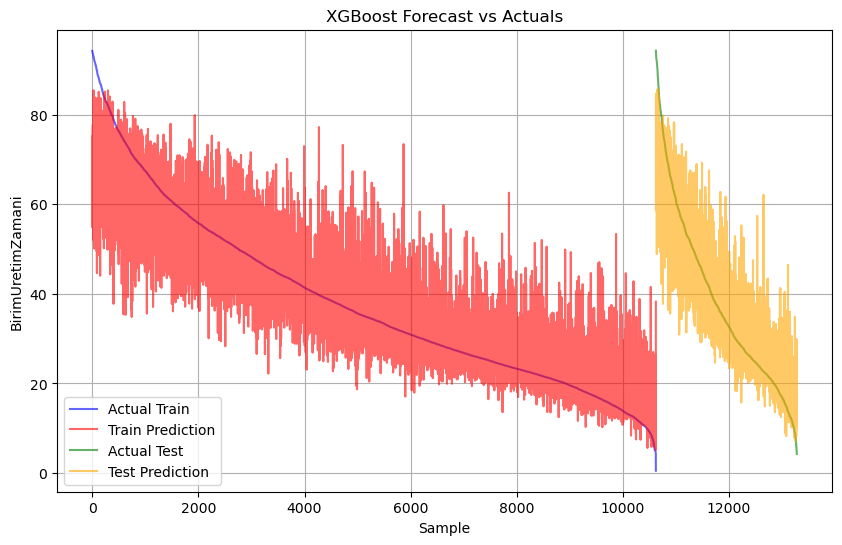

In [6]:
# Önceki MAPE sonuçlarını toplamak için bir DataFrame oluşturulması (örneğin sonuçları saklayacak bir tablo)
results = pd.DataFrame(columns=['Iteration', 'Train MAPE', 'Test MAPE'])

# MAPE sonuçlarını ve iterasyonları tabloya ekleme
for i in range(10):
    result_row = pd.DataFrame({
        'Iteration': [i + 1],
        'Train MAPE': [train_mape_list[i]],
        'Test MAPE': [test_mape_list[i]]
    })
    results = pd.concat([results, result_row], ignore_index=True)

# Ortalama MAPE sonuçlarını ekleyelim
mean_result_row = pd.DataFrame({
    'Iteration': ['Average'],
    'Train MAPE': [mean_train_mape],
    'Test MAPE': [mean_test_mape]
})
results = pd.concat([results, mean_result_row], ignore_index=True)

# Performansı görselleştirelim (Train ve Test seti üzerinde, tek bir plot ile)
fig, ax = plt.subplots(figsize=(10, 6))

# Train verilerini büyükten küçüğe sıralama
sorted_train_indices = np.argsort(-y_train)
y_train_sorted = y_train.iloc[sorted_train_indices]
y_train_pred_sorted = y_train_pred_cv[sorted_train_indices]

# Test verilerini büyükten küçüğe sıralama
sorted_test_indices = np.argsort(-y_test)
y_test_sorted = y_test.iloc[sorted_test_indices]
y_test_pred_sorted = y_test_pred[sorted_test_indices]

# Gerçek ve tahmin edilen değerleri çiz
ax.plot(y_train_sorted.values, label='Actual Train', color='blue', alpha=0.6)
ax.plot(y_train_pred_sorted, label='Train Prediction', color='red', alpha=0.6)
ax.plot(range(len(y_train_sorted), len(y_train_sorted) + len(y_test_sorted)), 
        y_test_sorted.values, label='Actual Test', color='green', alpha=0.6)
ax.plot(range(len(y_train_sorted), len(y_train_sorted) + len(y_test_sorted)), 
        y_test_pred_sorted, label='Test Prediction', color='orange', alpha=0.6)

# Grafiğin başlık ve etiketleri
ax.set_title(f'XGBoost Forecast vs Actuals')
ax.set_xlabel('Sample')
ax.set_ylabel('BirimUretimZamani')
ax.legend()
plt.grid(True)
plt.show()


En Düşük 20 Özellik:
              Feature  Importance
1          PersonelNo    0.043538
0            ModelAdi    0.052941
6       SIPARIS_ADEDI    0.058765
8         GIYSI_CINSI    0.068608
2         ModelTipAdi    0.071591
5              Uretim    0.074975
4          MakinaTipi    0.129524
7         GIYSI_GRUBU    0.152837
9  GIYSI_CINSI_DETAYI    0.160173
3             OperAdi    0.187048


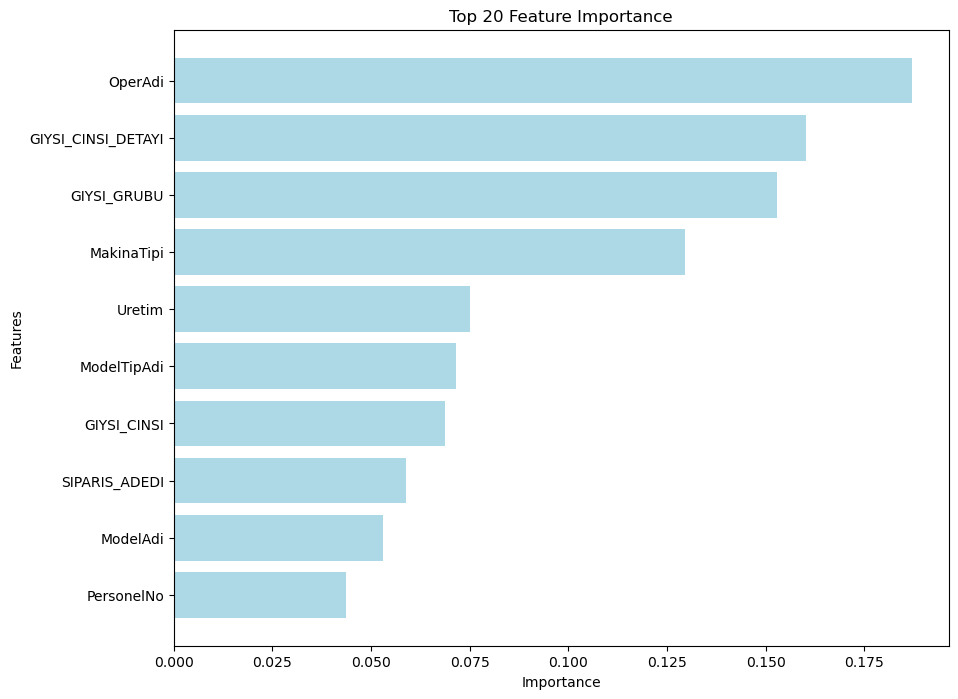

In [7]:
# Modelden feature_importances_ değerlerini alın
importances = best_model.feature_importances_

# Özellik isimlerini alın
feature_names = X.columns

# Özellik önem derecelerini DataFrame olarak oluşturun
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Önem derecelerine göre büyükten küçüğe sıralama
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# İlk 20 yüksek özelliği görüntüleme
top_20_features = feature_importance_df_sorted.head(20)

# İlk 20 özelliği büyükten küçüğe sıralama
top_20_features = top_20_features.sort_values(by='Importance', ascending=True)

# En düşük 20 özelliği görüntüleme
low_20_features = feature_importance_df_sorted.tail(20)

# En düşük 20 özelliği küçükten büyüğe sıralama
low_20_features = low_20_features.sort_values(by='Importance', ascending=True)

# En düşük 20 özelliği print etme
print("En Düşük 20 Özellik:")
print(low_20_features)

# Tüm özellik önem derecelerini büyükten küçüğe sıralanmış olarak CSV dosyasına yazdırma
feature_importance_df_sorted.to_csv('feature_importance_sorted.csv', index=False)

# Görselleştirme
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importance')
plt.show()